# Lab №5. Случайный лес

## <center>Теоретическая часть<a class="anchor" id="theory"></a><center>

<h1 align="center">Бэггинг, случайные леса и разложение ошибки на смещение и разброс</h1>

<h1 style="color:#008B8B">1. Бутстрап</h1>

Рассмотрим простой пример построения композиции алгоритмов. Пусть дана конечная выборка $X = (x_i, y_i)_{i=1}^{\ell}$ с вещественными ответами. Будем решать задачу линейной регрессии. Сгенерируем подвыборку с помощью *бутстрапа*. Равномерно возьмем из выборки $\ell$ объектов с возвращением. Отметим, что из-за возвращения среди них окажутся повторы. Обозначим новую выборку через $X_1$. Повторив процедуру $N$ раз, сгенерируем $N$ подвыборок $X_1, \dots, X_N$. Обучим по каждой из них линейную модель регрессии, получив *базовые алгоритмы* $b_1(x), \dots, b_N(x)$.

Предположим, что существует истинная функция ответа для всех объектов $y(x)$, а также задано распределение на объектах $p(x)$. В этом случае мы можем записать ошибку каждой функции регрессии

$\large \varepsilon_j(x) = b_j(x) - y(x),
\qquad
j = 1, \dots, N,$

и записать матожидание среднеквадратичной ошибки и это будет характеристикой качества $b_{j}(x)$ модели на всем пространстве объектов

$\large \mathbb{E}_x (b_j(x) - y(x))^2
=
\mathbb{E}_x \varepsilon_j^2(x).$

Средняя ошибка построенных функций регрессии имеет вид

$\large E_1
=
\frac{1}{N}
\sum\limits_{j = 1}^{N}
\mathbb{E}_x \varepsilon_j^2(x).$

Предположим, что ошибки несмещены (первое предположение) и некоррелированы (второе предположение), которое означет, что если $i$ модель ошиблась на некотором объекте, тогда из этого нельзя сделать предположения о $j$ модели на данном объекте, ошибается она или нет:

$\large \begin{align*}
    &\mathbb{E}_x \varepsilon_j(x) = 0;\\
    &\mathbb{E}_x \varepsilon_i(x) \varepsilon_j(x) = 0,
    \quad
    i \neq j.
\end{align*}$

Построим теперь новую функцию регрессии,
которая будет усреднять ответы построенных нами функций:

$\large a(x) = \frac{1}{N} \sum\limits_{j = 1}^{N} b_j(x).$

Найдем ее среднеквадратичную ошибку:

$\large \begin{align*}
    E_N
    &=
    \mathbb{E}_x \Biggl(
        \frac{1}{N} \sum\limits_{j = 1}^{n} b_j(x)
        -
        y(x)
    \Biggr)^2
    =\\
    &=
    \mathbb{E}_x \Biggl(
        \frac{1}{N} \sum\limits_{j = 1}^{N} \varepsilon_j(x)
    \Biggr)^2
    =\\
    &=
    \frac{1}{N^2}
    \mathbb{E}_x \Biggl(
        \sum\limits_{j = 1}^{N} \varepsilon_j^2(x)
        +
        \underbrace{\sum\limits_{i \neq j} \varepsilon_i(x) \varepsilon_j(x)}_{=0}
    \Biggr)
    =\\
    &=
    \frac{1}{N} E_1.
\end{align*}$

Мы получили, что математическое ожидание ошибки композииции в $N$ раз меньше чем математическое ожидание ошибки одной модели. Таким образом, усреднение ответов позволило уменьшить средний квадрат ошибки в $N$ раз!

Следует отметить, что рассмотренный нами пример не очень применим на практике, поскольку мы сделали предположение о некоррелированности ошибок, что редко выполняется. Если это предположение неверно, то уменьшение ошибки оказывается не таким значительным. Позже мы рассмотрим более сложные методы объединения алгоритмов в композицию, которые позволяют добиться высокого качества в реальных задачах.

<img src='images/rf_explained.png'>

<h1 style="color:#008B8B">2. Bias-Variance decomposition</h1>

Этот инструмент позволяет понять из чего складывается ошибка моделей. Допустим, у нас есть некоторая выборка, на которой линейные методы работают лучше решающих деревьев с точки зрения ошибки на контроле. Почему это так? Чем можно объяснить превосходство определенного метода обучения? Оказывается, ошибка любой модели складывается из трех факторов: сложности самой выборки, сходства модели с истинной зависимостью ответов от объектов в выборке, и богатства семейства, из которого выбирается конкретная модель. Между этими факторами существует некоторый баланс, и уменьшение одного из них приводит к увеличению другого. Такое разложение ошибки носит название разложения на смещение и разброс, и его формальным выводом мы сейчас займемся.


Пусть задана выборка $X = (x_i, y_i)_{i = 1}^{\ell}$ с вещественными ответами $y_i \in \mathbb{R}$ (рассматриваем задачу регрессии). Будем считать, что на пространстве всех объектов и ответов $\mathbb{X} \times \mathbb{Y}$ существует распределение $p(x, y)$, из которого сгенерирована выборка $X$ и ответы на ней. Другими словами, для любой пары (объекта, ответ) мы знаем вероятность того, что она попадется в выборке.

Рассмотрим квадратичную функцию потерь

$$\large L(y, a)
=
\bigl(
    y - a(x)
\bigr)^2$$

Поскольку мы знаем вероятность получить получения любой пары (объекта, ответ), тогда мы сможем посчитать для квадратичной функции потерь соответствующий ей *среднеквадратичный риск*

$$\large R(a)
=
\mathbb{E}_{x, y}\Bigl[
    \bigl(
        y - a(x)
    \bigr)^2
\Bigr]
=
\int_\mathbb{X}
\int_\mathbb{Y}
    p(x, y)
    \bigl(
        y - a(x)
    \bigr)^2
dx
dy.$$

Простыми словами, мы берем все точки (пары $x, y$) в пространстве и для конкретной пары $x, y$ считаем вероятность получить эту пару и умножаем на ошибку модели на этой паре $x, y$. Тогда, если ошибка большая, но вероятность получить такую пару низкая, тогда это не внесет большого вклада. Тем самым, это некторая характеристика модели на всех данных, в реальности у нас нет распределения веоятностей на всех объектах-ответах.

Данный функционал усредняет ошибку модели в каждой точке пространства $x$ и для каждого возможного ответа $y$, причём вклад пары $(x, y)$, по сути, пропорционален вероятности получить её в выборке $p(x, y)$. Другими словами, это способ посчитать ошибку модели если мы знаем распределение на всем пространстве объектов и ответов. Разумеется, на практике мы не можем вычислить данный функционал, поскольку распределение $p(x, y)$ неизвестно. Тем не менее, в теории он позволяет измерить качество модели на всех возможных объектах, а не только на обучающей выборке.

<h2 style="color:#008B8B">2.1 Ошибка метода обучения</h2>

Для того, чтобы построить идеальную функцию регрессии, необходимо знать распределение на объектах и ответах $p(x, y)$, что, как правило, невозможно. Для обучения модели берется конечная выборка и по ней выбираем оптимальную модель. Другими словами, на практике вместо этого выбирается некоторый *метод обучения* $\mu: (\mathbb{X} \times \mathbb{Y})^\ell \to \mathbb{A}$, который произвольной обучающей выборке ставит в соответствие некоторый алгоритм из семейства $\mathbb{A}$. В качестве меры качества метода обучения можно взять усредненный по всем выборкам среднеквадратичный риск алгоритма, выбранного методом $\mu$ по выборке:

Для конкретной модели мы можем посчитать математическое ожидание как 

$\mathbb{E}_{x, y} \Bigl[
    \bigl(
    y - a(x)
    \bigr)^2
\Bigr]$

Но сейчас у нас нет конкретной модели, есть результат метода обучения на выборке и мы можем взять результат метода обучения применив его к обучающей выборке $X$, тогда мы получим модель, которая способна дать прогноз в любой точке:

$\mathbb{E}_{x, y} \Bigl[
    \bigl(
    y - \mu(X)(x)
    \bigr)^2
\Bigr]$

Тогда усредним эти ошибки по всем возможным обучающим выборкам $X$ и это будет среднеквадратическим риском метода обучения:

$L(\mu)
=
\mathbb{E}_{X} \Bigl[
    \mathbb{E}_{x, y} \Bigl[
        \bigl(
        y - \mu(X)(x)
        \bigr)^2
    \Bigr]
\Bigr]$ - Среднеквадратический риск метода обучения

Другими словами, мы перебираем все возможные обучающие выборки, для каждой обучающей выборки строим соответствующую модель методом обучения и для этой модели считаем среднеквадратичный риск. 

**Подставим среднеквадратичный риск в формулу $L(\mu)$**

Обратим внимание, что результатом применения метода обучения $\mu(X)$ к выборке $X$ является модель, поэтому правильно писать $\mu(X)(x)$. Но это довольно громоздкая запись, поэтому будем везде дальше писать просто $\mu(X)$, но не будем забывать, что это функция, зависящая от объекта $x$.

$\begin{align}
    L(\mu)
    &=
    \mathbb{E}_{X} \Bigl[
        \underbrace{
            \mathbb{E}_{x, y} \Bigl[
                \bigl(
                    y - \mathbb{E}[y | x]
                \bigr)^2
            \Bigr]
        }_{\text{не зависит от $X$}}
        +
        \mathbb{E}_{x, y} \Bigl[
            \bigl(
                \mathbb{E}[y | x]
                -
                \mu(X)
            \bigr)^2
        \Bigr]
    \Bigr]
    =\notag\\
    &=
    \mathbb{E}_{x, y} \Bigl[
        \bigl(
            y - \mathbb{E}[y | x]
        \bigr)^2
    \Bigr]
    +
    \mathbb{E}_{x, y} \Bigl[
        \mathbb{E}_{X} \Bigl[
            \bigl(
                \mathbb{E}[y | x]
                -
                \mu(X)
            \bigr)^2
        \Bigr]
    \Bigr]. \label{eq:decomp1}
\end{align}$

Так как первое слогаемое не зависит от $X$, перепишем его как есть. А второе слогаемо упростим и получим:

$\begin{align}
    &L(\mu)
    =
    \underbrace{
        \mathbb{E}_{x, y} \Bigl[
            \bigl(
                y - \mathbb{E}[y | x]
            \bigr)^2
        \Bigr]
    }_{\text{шум}}
    +\notag\\
    &+
    \underbrace{
        \mathbb{E}_{x} \Bigl[
            \bigl(
                \mathbb{E}_{X} \bigl[ \mu(X) \bigr]
                -
                \mathbb{E}[y | x]
            \bigr)^2
        \Bigr]
    }_{\text{смещение}}
    +
    \underbrace{
        \mathbb{E}_{x} \Bigl[
            \mathbb{E}_{X} \Bigl[
                \bigl(
                    \mu(X)
                    -
                    \mathbb{E}_{X} \bigl[ \mu(X) \bigr]
                \bigr)^2
            \Bigr]
        \Bigr]
    }_{\text{разброс}}. \label{eq:biasVarDecomp}
\end{align}$

Рассмотрим подробнее компоненты полученного разложения ошибки.
Первая компонента характеризует *шум* в данных и равна ошибке идеального алгоритма. Невозможно построить алгоритм, имеющий меньшую среднеквадратичную ошибку. Вторая компонента характеризует *смещение (bias)* метода обучения, то есть отклонение среднего ответа обученного алгоритма от ответа идеального алгоритма. Третья компонента характеризует *дисперсию (variance)*, то есть разброс ответов обученных алгоритмов относительно среднего ответа. 

**Шум**

Это слогаемое не зависит от модели, следовательно это показатель качества данных. Берем все пары (объект, ответ) и сравниваем в каждой точке правильный ответ с прогнозом лучшей модели (мы выше выснили, что математическое ожидание $\mathbb{E}[y | x]$ - это оптимальная модель в данной точке). Значи, первое слогаемо это ошибка на всех данных лучшей из возможных моделей. Это слогаемо измеряет насколько плоха лучшая из моделей и данное слогаемое не зависит от модели. Если в каждой точке $x$ распределение $y$ при условии $x$ выражденное (только один объект может быть в точке), тогда шум будет равен 0.

**Смещение**

Смещение показывает, насколько хорошо с помощью данных метода обучения и семейства алгоритмов можно приблизить оптимальный алгоритм. Как правило, смещение маленькое у сложных семейств (например, у деревьев) и большое у простых семейств (например, линейных классификаторов). Дисперсия показывает, насколько сильно может изменяться ответ обученного алгоритма в зависимости от выборки - иными словами, она характеризует чувствительность метода обучения к изменениям в выборке. Как правило, простые семейства имеют маленькую дисперсию, а сложные семейства - большую дисперсию.

$\mathbb{E}[y | x]$ - это оптимальная модель в данной точке.

$\mathbb{E}_{X} \bigl[ \mu(X) \bigr]$ - это средний пргноз всех возможных моделей. Мы взяли все возможные обучающие выборки $X_1, \ldots$ размера $\ell$, на каждой обучили модель $b_1(x)$ и усреднили их предсказание.

Значит, это слогаемое показыват насколько всреднем модели откланяются от идеального прогноза. Тем самым, это некотарая характеристика того, насколько большое семейство моделей. Или другими словами, показывает насколько метод обучения способен приблизить данные, выдать мощную модель или же быть похожим на лучшую из возможных моделей.

**Разброс**

В этом слогаемом мы берем конкретную выборку $X$ - $\mathbb{E}_{X}$, берем на ней обученную модель конкретно на выборке $X$ - $\mu(X)$ и смотрим на ее отклонение от средней модели $\mathbb{E}_{X} \bigl[ \mu(X) \bigr]$ по всем обучающим выборкам. Это слогаемое показыват, насколько взависимости от конкретной обучающей выборки может модель откланяться от средней. Чем больше значение этого слогаемого, тем сильнее выборка влияет на модель. Следовательно, слогаемое показывает чувствительность модели к изменениям в обучающей выборке.

**Прдемонстрируем низкое смещение (bias) и большой разброс (variance)**

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def f(x):
    return 6 + 500 * x - 4 * x ** 2 - 5 * x ** 3

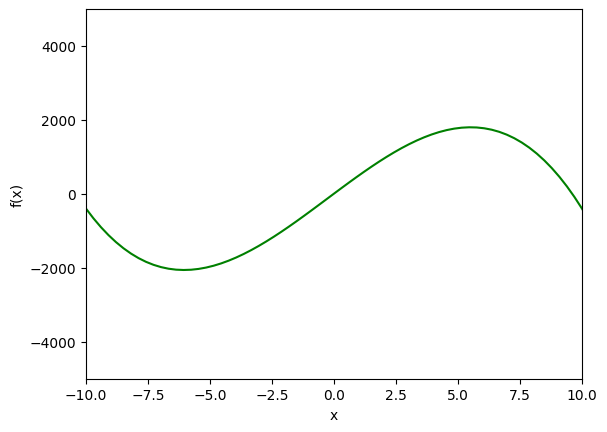

In [13]:
dots = np.linspace(-10, 20, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g');

In [16]:
x_datas = []
f_datas = []

for i in range(10):
    x_data = np.random.uniform(-10, 10, 30)
    x_datas.append(x_data)
    f_datas.append([f(i) * 2.5 if np.random.binomial(1, 0.05) else f(i) for i in x_data] + np.random.uniform(-500, 500, 30)) 

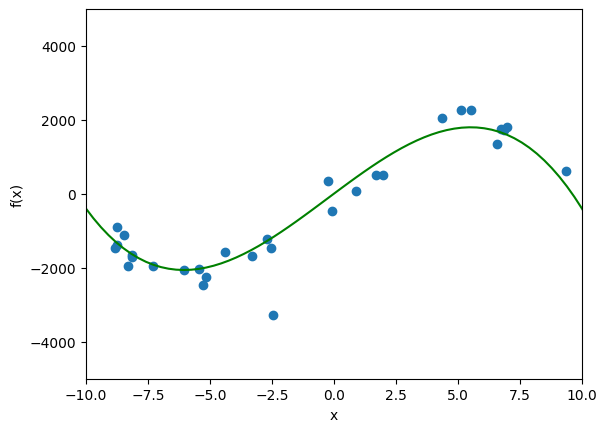

In [17]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_datas[2], f_datas[2]);

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

regressors = []
for i in range(10):
    # создадим модель
    regressor = DecisionTreeRegressor(random_state=10, max_depth=1)
    # обучим ее
    regressor.fit(np.reshape(x_datas[i], (-1, 1)), f_datas[i])
    regressors.append(regressor)

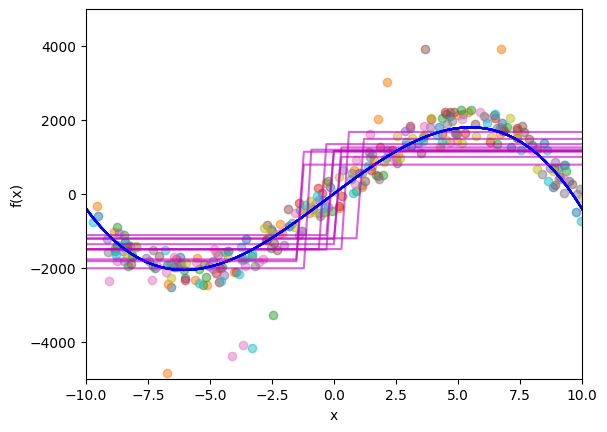

In [35]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

predictions = []
for i in range(10):
    plt.plot(dots, f(dots), color='b', alpha=1)
    plt.scatter(x_datas[i], f_datas[i], alpha=0.5)
    prediction = regressors[i].predict(np.reshape(dots, (-1, 1)))
    predictions.append(prediction)
    plt.plot(dots, prediction, color='m', alpha=0.6);
predictions = np.array(predictions)

In [36]:
mean_prediction = np.mean(predictions, axis=0)

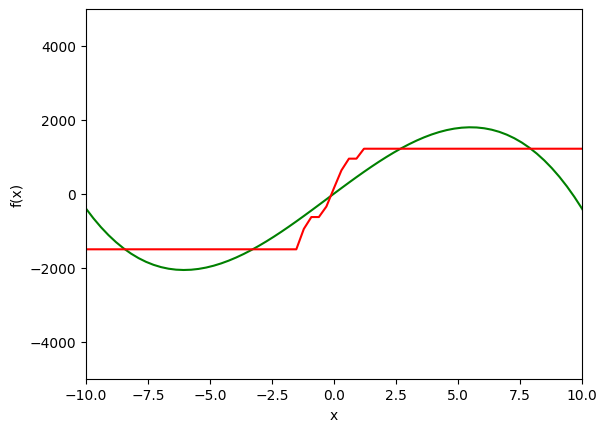

In [37]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g')
plt.plot(dots, mean_prediction, color='r');

**Прдемонстрируем высокое смещение (bias) и низкий разброс (variance)**

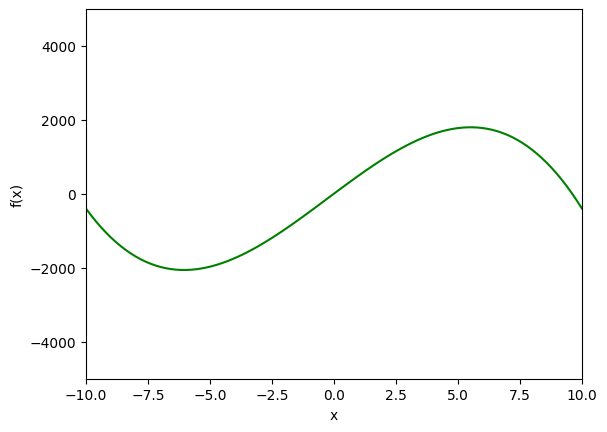

In [409]:
dots = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g');

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

regressors = []
for i in range(10):
    # создадим модель
    regressor = LinearRegression()
    
    # обучим ее
    regressor.fit(np.reshape(x_datas[i], (-1, 1)), f_datas[i])
    regressors.append(regressor)

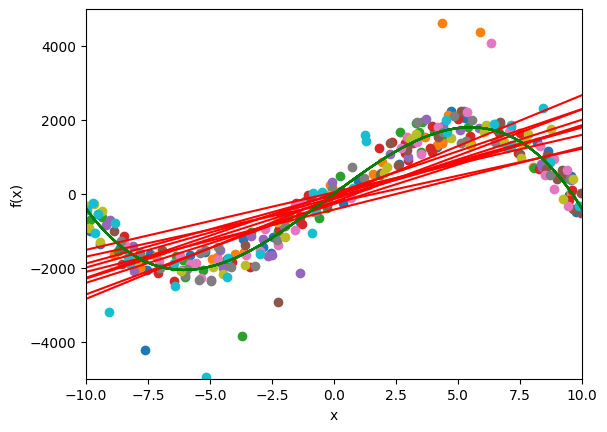

In [7]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

predictions = []
for i in range(10):
    plt.plot(dots, f(dots), color='g')
    plt.scatter(x_datas[i], f_datas[i])
    prediction = regressors[i].predict(np.reshape(dots, (-1, 1)))
    predictions.append(prediction)
    plt.plot(dots, prediction, color='r');
predictions = np.array(predictions)

In [9]:
mean_prediction = np.mean(predictions, axis=0)

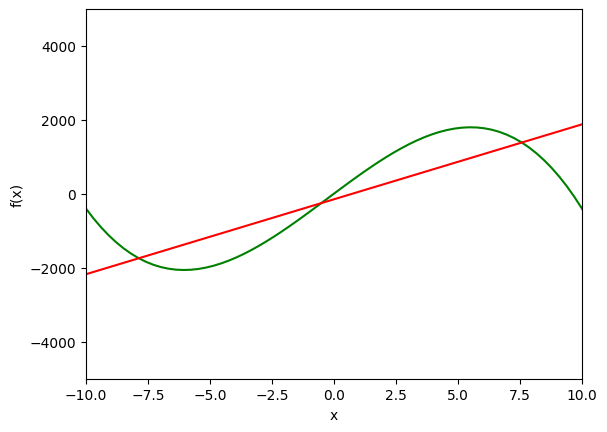

In [10]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g')
plt.plot(dots, mean_prediction, color='r');

**Усреднение алгоритмов:**

- Не меняется смещение

- Разброс = $\frac{\text {разброс базового алгоритма}}{N} + \text {корреляция между базовыми алгоритмами}$


Есть два подхода, позволяющих уменьшить корреляцию: 

* _бэггинг_ (обучение базовых алгоритмов на случайной подвыборке),
* _метод случайных подпространств_ (обучение базовых алгоритмов на случайном подмножестве признаков) или их комбинация. 

**Бутстрап**

Случайные леса названы так из-за того, что в процесс построения деревьев, из которых они состоят, внесен элемент случайности для обеспечения уникальности каждого из деревьев. Такая рандомизация заключается в обучении базовых алгоритмов на разных подвыборках обучающей выборки. Один из способов построения случайных подвыборок - _бутстрап (bootstrap)_. Этот метод заключается в получении из выборки длины $l$ нескольких разных выборок той же длины $l$. Для получения бутстрап-выборки из исходной выборки $l$ раз выбирается случайный элемент, причем каждый раз новый элемент выбирается из всей выборки. Таким образом, в полученной в конечном итоге бутстрап-выборке некоторые элементы исходной выборки будут встречаться несколько раз, а некоторые (примерно 37% выборки) будут вовсе отсутствовать, и при повторении $N$ раз мы получим $N$ разных выборок длиной $l$. Например, если у нас есть исходная выборка вида [a, b, c, d, e], возможными бутстрап-выборками могут быть [a, b, a, c, b] или [b, e, e, d, b] и т.д.

In [ ]:
5: x1, x2, x3, x4, x5
    
1: x2, x3, x2, x3, x1
2: x1, x5, x3, x3, x2
3: x3, x2, x2, x4, x5

<img src="images/bootstrap.png" width=500px>

__Бэггинг__

<img src="images/Bagging.png" width=700px>

__Метод случайных подпространств__

<img src="images/Random_Subspaces.png" width=700px>

In [ ]:
f1, f2, f3, f4, f5
n = 3

1: f1, f4, f3
2: f5, f3, f2
3: f4, f5, f3

1) https://academy.yandex.ru/handbook/ml/article/bias-variance-decomposition

2) https://academy.yandex.ru/handbook/ml/article/ansambli-v-mashinnom-obuchenii

3) https://stepik.org/course/3089/info

Возникает вопрос, какие модели $b_n(x)$ брать, какой размер $N$ выбрать... Для этого воспользуемся сещением и разбросом.

**Смещение $a_N (x)$**

\begin{align*}
    \mathbb{E}_{x, y} &\Bigl[
        \Bigl(
            \mathbb{E}_{X} \Bigl[
                \frac{1}{N}
                \sum_{n = 1}^{N}
                    \tilde \mu(X)(x)
            \Bigr]
            -
            \mathbb{E}[y | x]
        \Bigr)^2
    \Bigr]
    =\\
    &=
    \mathbb{E}_{x, y} \Bigl[
        \Bigl(
                \frac{1}{N}
                \sum_{n = 1}^{N}
                    \mathbb{E}_X[ \tilde \mu(X)(x) ]
            -
            \mathbb{E}[y | x]
        \Bigr)^2
    \Bigr]
    =\\
    &=
    \mathbb{E}_{x, y} \Bigl[
        \bigl(
            \mathbb{E}_{X} \bigl[
                \tilde \mu(X)(x)
            \bigr]
            -
            \mathbb{E}[y | x]
        \bigr)^2
    \Bigr].
\end{align*}


Мы получили, что смещение композиции, полученной с помощью бэггинга, совпадает со смещением одного базового алгоритма. Таким образом, бэггинг не ухудшает смещенность модели. Следовательно, необходимо брать базовые модели сложнее, несмещенные.

Теперь перейдём к разбросу. Запишем выражение для дисперсии композиции,
обученной с помощью бэггинг

$$\mathbb{E}_{x, y} \Bigl[
    \mathbb{E}_{X} \Bigl[
        \Bigl(
            \frac{1}{N}
            \sum_{n = 1}^{N}
                \tilde \mu(X)(x)
            -
            \mathbb{E}_{X} \Bigl[
                \frac{1}{N}
                \sum_{n = 1}^{N}
                    \tilde \mu(X)(x)
            \Bigr]
        \Bigr)^2
    \Bigr]
\Bigr].$$

Проведя ряд преобразований, мы получим:

$$\frac{1}{N}
\mathbb{E}_{x, y} \Bigl[
    \mathbb{E}_{X} \Bigl[
        \Bigl(
            \tilde \mu(X)(x)
            -
            \mathbb{E}_{X} \bigl[
                \tilde \mu(X)(x)
            \bigr]
        \Bigr)^2
    \Bigr]
\Bigr]
+\frac{N(N-1)}{N^2}
\mathbb{E}_{x, y} \Bigl[
    \mathbb{E}_{X} \Bigl[
        \Bigl(
            \tilde \mu(X)(x)
            -
            \mathbb{E}_{X} \bigl[
                \tilde \mu(X)(x)
            \bigr]
        \Bigr)
        \times\\
        \times
        \Bigl(
            \tilde \mu(X)(x)
            -
            \mathbb{E}_{X} \bigl[
                \tilde \mu(X)(x)
            \bigr]
        \Bigr)
    \Bigr]
\Bigr]$$

Если бы равенство состояло только из первого слогаемого, тогда получилось бы, что разброс бэггинга - это разброс одной модели деленное на $N$, но это не так, так как ещё имеется второе слогаемое.

Второе слогаемое - мы берем две базовые модели обученных одним и тем же методом обучения. И второе слогаемое является ковариацией двух базовых моделей. Если в более простой форме, разброс $a_N(x)$ это:

$\large a_N(x) = \frac{1}{N} \cdot \text{разброс } b_1(x) + \text{cov}(b_1(x), b_2(x))$, почему $b_1, b_2$? Поскольку модели одинаково распределены (генерируем одним и тем же методым обучения), тогда можно считать ковариацию между люыми идексами $b_1, b_8$, разницы нет. Это просто ковариация двух разных моделей из композиции.

**Вывод:** И если необходимо уменьшать разброс, тогда надо избавиться от слогаемого ковариции, следовательно необходимо строить не корреллированные базовые модели. И если у нас будет нулевая корреляция, тогда композиция будет уменьшать разброс базовой модели в $N$ раз, а смешение останется таким же как у базовоай модели.

Это логично, если базовые модели скоррелированные сильно, выдают одно и то же, тогда усреднение ничего не даст. Следовательно, базовые модели должны быть как можно различными.

<h2 style="color:#008B8B">3.1 Случайные леса</h2>

**Как повышать разнообразие базовых моделей?**

1) Обучать не на всех объектах

2) Обучать не на всех признаках - это плохая идея.


3) Лучший предикат в каждой вершине выбирается из случайного подмножества признаков (свое подмножество в каждой вершине). Это делается в методе "Случайный лес".

**Алгоримт случайного леса:**

1) Строим $N$ моделей $b_1(x), \ldots, b_N(x)$

Одна модель $b_n(x)$ строится пока в каждом листе не окажется мало объектов.

2) Лучший предикат в каждой вершине выбирается из случайного подмножества признаков. За $m$ обозначим число признаков, из которых выбираем лучший предикат. В случае классификации $m = \lfloor\sqrt{d}\rfloor$, регрессии $m = \big\lfloor\frac{d}{3}\big\rfloor$

Дальше в случае регресси усредняем эти модели:

$\large a_N(x)
=
\frac{1}{N}
\sum\limits_{n = 1}^{N}
    b_n(x)$
    
В случае классификации выполняется голосование по большенству:

$\large a_N(x)
=
\underset{y \in \mathbb{Y}}{\text{argmax}} \sum\limits_{n = 1}^{N} [b_n(x) = y]$

**Выбор $N$**

У этого алгоритма всего единственный гипперпараметр, который оказывает основное воздействие на касчетсво. Построим график, где по оси $X$ размер композиции $N$, а по оси $y$ ошибка на тестовой выборке. По мере роста $N$ кривая выходит на асимптоту, следовательно не происходит переобучение по мере роста $N$.

**Недостатки:**

* Медленно обучается.
* Если одно дерево плохо подходит под задачу (экстраполяция), тогда смешение будет высоким.

### 3.1.1 Out-of-Bag

Каждая базовая модель обучается бутсрпированной подвыборке, значит для каждого дерева имеются объекты, которые дерево не видело. Для каждой базовой модели $b_n(x)$ имеются тестовые объекты в обучающей выборке. Тогда без отложенной выбоки можно посчитать качество модели?

$\large \text{OOB}
=
\sum\limits_{i = 1}^{\ell}
    L \left(
        y_i,
        \frac{1}{\sum_{n = 1}^{N} [x_i \notin X_n]}
        \sum\limits_{n = 1}^{N}
            [x_i \notin X_n] b_n(x_i)
    \right)$
    
Суммируем по всем объектам обучающей выборки и для каждого объекта посчитаем ошибку. 

* Где $L(y, z)$ — функция потерь. 

* $y_i$ - Правильный ответ

* $X_n$ - обучающая выборка для $b_n(x)$


$\large \frac{1}{\sum_{n = 1}^{N} [x_i \notin X_n]}$ - еденицу делим на количество моделей, которые не обучались $x_i$ объекте. 

Считаем сумму по всем моделям, индикатор того, что модель $n$ модель не обучалсь на $i$ объекте и умножаем на прогноз данной модели:

$\large \sum\limits_{n = 1}^{N} [x_i \notin X_n] b_n(x_i)$

Другими словами мы берем $x_i$ объект и считаем на скольки деревья этот объект не использовался в обучении и усредняем прогнозы этих деревьев на этом объекте.

**Итого:** Берем $x_i$ объект смотрим какие базовые модели не обучались на нем и усредняем прогнозы этих моделей на этом объекте. Следовательно, модели не обучались на этом объекты, он для них является тестовым. Можно показать, что по мере увеличения числа деревьев $N$ данная оценка стремится к leave-one-out-оценке, но при этом существенно
проще для вычисления.

## Реализация случайного леса <a class='anchor' id='implement'>

Для лучшего понимания алгоритма построения случайного леса реализуем его на Python.

In [55]:
import matplotlib.pyplot as plt
import random

from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification

import numpy as np

In [56]:
# сгенерируем данные, представляющие собой 500 объектов с 5-ю признаками
classification_data, classification_labels = make_classification(n_samples=500,
                                                                 n_features=5, n_informative=5, 
                                                                 n_classes=2, n_redundant=0, 
                                                                 n_clusters_per_class=1, random_state=23)

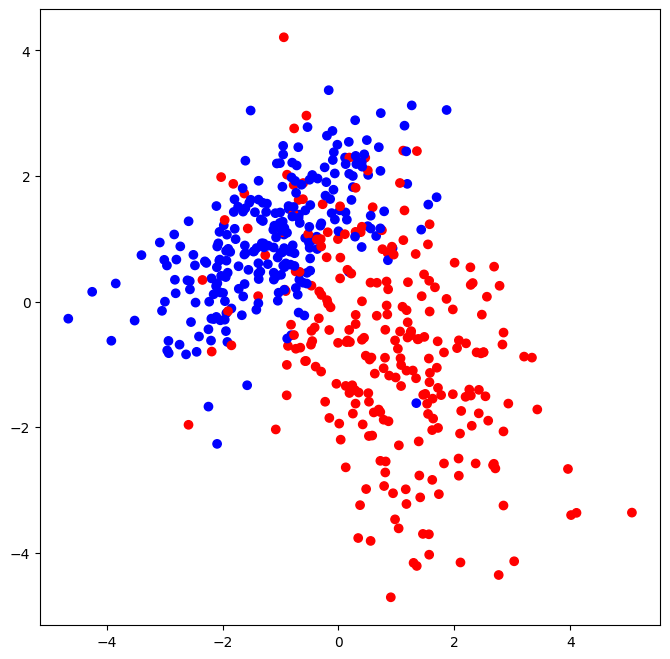

In [57]:
# визуализируем сгенерированные данные

colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])

plt.figure(figsize=(8,8))
plt.scatter(classification_data[:, 0], classification_data[:, 1], 
              c=classification_labels, cmap=colors);

Реализуем генерацию $N$ бутстрап-выборок и подмножества признаков для нахождения разбиения в узле.

In [58]:
np.random.seed(42)

def get_bootstrap(data, labels, N):
    n_samples = data.shape[0] # размер совпадает с исходной выборкой
    bootstrap = []
    
    for i in range(N):
        
        sample_index = np.random.randint(0, n_samples, size=n_samples)
        b_data = data[sample_index]
        b_labels = labels[sample_index]
        
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

In [59]:
# get_bootstrap(classification_data, classification_labels, 2)

In [60]:
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = list(range(len_sample))

    len_subsample = int(np.round(np.sqrt(len_sample)))
    
    subsample = np.random.choice(sample_indexes, size=len_subsample, replace=False)

    return subsample

In [61]:
get_subsample(5)

array([1, 4])

Далее повторим реализацию построения дерева решений из предыдущего урока с некоторыми изменениями

In [62]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [63]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
            
        # найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction   

In [64]:
# Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [65]:
# Расчет прироста

def gain(left_labels, right_labels, root_criterion, criterion):

    # доля выборки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return root_criterion - p * criterion(left_labels) - (1 - p) * criterion(right_labels)

In [66]:
# Разбиение датасета в узле

def split(data, labels, column_index, t):
    
    left = np.where(data[:, column_index] <= t)
    right = np.where(data[:, column_index] > t)
        
    true_data = data[left]
    false_data = data[right]
    
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [67]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
#     min_leaf_samples = 5

    root_gini = gini(labels)

    best_gain = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    feature_subsample_indices = get_subsample(n_features) # выбираем случайные признаки
    
    for index in feature_subsample_indices:
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique(data[:, index])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
#             if len(true_data) < min_leaf_samples or len(false_data) < min_leaf_samples:
#                 continue
            
            current_gain = gain(true_labels, false_labels, root_gini, gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_gain > best_gain:
                best_gain, best_t, best_index = current_gain, t, index

    return best_gain, best_t, best_index

In [68]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):

    gain, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if gain == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

Теперь добавим функцию формирования случайного леса.

In [69]:
def random_forest(data, labels, n_trees):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap: 
        forest.append(build_tree(b_data, b_labels))
        
    return forest

In [70]:
# Функция классификации отдельного объекта

def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [71]:
# функция формирования предсказания по выборке на одном дереве

def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [98]:
# предсказание голосованием деревьев

def tree_vote(forest, data):

    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
    print(predictions)

    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))
    print(predictions_per_object)

    # выберем в качестве итогового предсказания для каждого объекта то,
    # за которое проголосовало большинство деревьев
    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(max(set(obj), key=obj.count))
        
    return voted_predictions

In [99]:
tree_vote(my_forest_3, test_data[:5])

[[0, 1, 1, 0, 0], [0, 1, 1, 0, 1], [1, 1, 0, 0, 1]]
[(0, 0, 1), (1, 1, 1), (1, 1, 0), (0, 0, 0), (0, 1, 1)]


[0, 1, 1, 0, 1]

Далее мы сделаем обычное разбиение выборки на обучающую и тестовую, как это делалось ранее. Оценить ошибку этого же алгоритма по методу Out-of-Bag будет вашим домашним заданием к этому уроку.

In [74]:
# Разобьем выборку на обучающую и тестовую

from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(classification_data, 
                                                                    classification_labels, 
                                                                    test_size=0.3,
                                                                    random_state=1)

In [75]:
# Введем функцию подсчета точности как доли правильных ответов

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

Теперь построим несколько случайных лесов с разным количеством деревьев в них.

Построим лес из одного дерева

In [76]:
%%time
n_trees = 1
my_forest_1 = random_forest(train_data, train_labels, n_trees)

CPU times: total: 31.2 ms
Wall time: 109 ms


In [77]:
# Получим ответы для обучающей выборки 
train_answers = tree_vote(my_forest_1, train_data)

In [78]:
# И получим ответы для тестовой выборки
test_answers = tree_vote(my_forest_1, test_data)

In [79]:
# Точность на обучающей выборке
train_accuracy = accuracy_metric(train_labels, train_answers)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}')

# Точность на тестовой выборке
test_accuracy = accuracy_metric(test_labels, test_answers)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.3f}')

Точность случайного леса из 1 деревьев на обучающей выборке: 94.000
Точность случайного леса из 1 деревьев на тестовой выборке: 84.667


Построим лес из трех деревьев

In [80]:
%%time
n_trees = 3
my_forest_3 = random_forest(train_data, train_labels, n_trees)

CPU times: total: 359 ms
Wall time: 387 ms


In [81]:
# Получим ответы для обучающей выборки 
train_answers = tree_vote(my_forest_3, train_data)

In [82]:
# И получим ответы для тестовой выборки
test_answers = tree_vote(my_forest_3, test_data)

In [83]:
# Точность на обучающей выборке
train_accuracy = accuracy_metric(train_labels, train_answers)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}')

# Точность на тестовой выборке
test_accuracy = accuracy_metric(test_labels, test_answers)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.3f}')

Точность случайного леса из 3 деревьев на обучающей выборке: 97.143
Точность случайного леса из 3 деревьев на тестовой выборке: 87.333


Построим лес из десяти деревьев

In [84]:
%%time
n_trees = 10
my_forest_10 = random_forest(train_data, train_labels, n_trees)

CPU times: total: 1 s
Wall time: 1.28 s


In [85]:
# Получим ответы для обучающей выборки 
train_answers = tree_vote(my_forest_10, train_data)

In [86]:
# И получим ответы для тестовой выборки
test_answers = tree_vote(my_forest_10, test_data)

In [87]:
# Точность на обучающей выборке
train_accuracy = accuracy_metric(train_labels, train_answers)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}')

# Точность на тестовой выборке
test_accuracy = accuracy_metric(test_labels, test_answers)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.3f}')

Точность случайного леса из 10 деревьев на обучающей выборке: 99.714
Точность случайного леса из 10 деревьев на тестовой выборке: 96.000


Построим лес из пятидесяти деревьев

In [92]:
%%time
n_trees = 50
my_forest_50 = random_forest(train_data, train_labels, n_trees)

CPU times: total: 5.25 s
Wall time: 6.24 s


In [93]:
# Получим ответы для обучающей выборки 
train_answers = tree_vote(my_forest_50, train_data)

In [94]:
# И получим ответы для тестовой выборки
test_answers = tree_vote(my_forest_50, test_data)

In [95]:
# Точность на обучающей выборке
train_accuracy = accuracy_metric(train_labels, train_answers)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}')

# Точность на тестовой выборке
test_accuracy = accuracy_metric(test_labels, test_answers)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.3f}')

Точность случайного леса из 50 деревьев на обучающей выборке: 100.000
Точность случайного леса из 50 деревьев на тестовой выборке: 96.000


Как можно увидеть из показателей качества предсказаний, точность случайного леса возрастает при увеличении числа деревьев в нем. При этом по точности на тестовой выборке можно сказать, что при увеличении количества деревьев до 50 наш лес не переобучается. Это одна из основных особенностей случайного леса - он редко переобучается при увеличении числа базовых алгоритмов, а ошибка выходит на асимптоту.

## Домашнее задание<a class='anchor' id='hw'>

1. Сформировать с помощью sklearn.make_classification датасет из 1000 объектов с двумя признаками, обучить случайный лес из 1, 3, 10 и 50 деревьев и визуализировать их разделяющие гиперплоскости на графиках (по подобию визуализации деревьев из предыдущей лабораторной работы №4, необходимо только заменить вызов функции predict на tree_vote).
2. Сделать выводы о получаемой сложности гиперплоскости и недообучении или переобучении случайного леса в зависимости от количества деревьев в нем.

3. Заменить в реализованном алгоритме проверку с помощью отложенной выборки на Out-of-Bag.


## Дополнительные материалы

1. [Смещение и разброс](https://dyakonov.org/2018/04/25/%D1%81%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D0%B5-bias-%D0%B8-%D1%80%D0%B0%D0%B7%D0%B1%D1%80%D0%BE%D1%81-variance-%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82/)
2. [Бэггинг с точки зрения статистики](https://habr.com/ru/company/ods/blog/324402/#begging)
3. [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
4. [Случайный лес (Random Forest)](https://dyakonov.org/2016/11/14/%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B9-%D0%BB%D0%B5%D1%81-random-forest/)
5. [Реализация и разбор алгоритма «случайный лес» на Python](https://tproger.ru/translations/python-random-forest-implementation/)
6. [Прикладные задачи анализа данных. Случайные леса](http://www.machinelearning.ru/wiki/images/c/cc/PZAD2016_09_rf.pdf)

**Материалы по OOB:**
1. [Статья с курса по ML от ODS](https://habr.com/ru/company/ods/blog/324402/#out-of-bag-error)
2. [Тоже хорошее объяснение](https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710)
3. [Пример из документации sklearn'a](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html)
4. [И очень хорошее видео про случайный лес и в частности OOB](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ)

## Summary

__Случайный лес__

* Один из сильнейших “классических" алгоритмов машинного обучения
* Не требователен к обучающей выборке (не требуется нормализация, очистка от шума, ...) 
* Легко параллелится, так как базовые модели обучаются независимо друг от друга
* Слабо подвержен переобучению 
* Дает оценку важности признаков (feature importance)
* Не требует дополнительной валидационной выборки (за счет OOB-score)

### Определения
*Композиции*

**Ансамбли** — это методы, сочетающие в себе несколько алгоритмов машинного обучения для получения более мощной модели.

**Бутстрап (bootstrap)** — метод сэмплирования подвыборки. Заключается в получении из выборки длины  𝑙  нескольких разных выборок той же длины  𝑙.

**Бэггинг** — обучение базовых алгоритмов на случайной подвыборке.

**Метод случайных подпространств** — обучение базовых алгоритмов на случайном подмножестве признаков или их комбинация. 

*Разложение ошибки*

**Смещение (bias)** — отклонение среднего ответа обученного алгоритма от ответа идеального алгоритма.

**Разброс или дисперсии (variance)** — разброс ответов обученных алгоритмов отнисительно среднего ответа.

**Шум** — ошибка идеального алгоритма, характеристика входных данных.

